## Problem Statement: 
    In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc

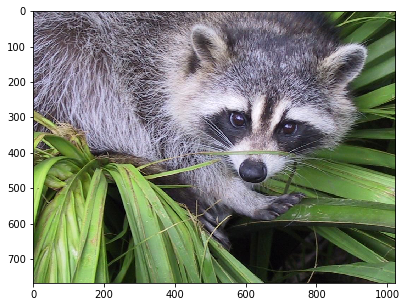

In [2]:
# Reading the image from Scipy package and displaying it.
faceimg=misc.face()
plt.figure(figsize=(10,5))
plt.imshow(faceimg)

In [3]:
# Reading the number of rows and columns of image
rows= faceimg.shape[0]
columns= faceimg.shape[1]

In [4]:
print("Number of rows", rows)
print("Number of columns", columns)

Number of rows 768
Number of columns 1024


### Compression using the Kmeans clustering

In [5]:
# Reshaping the image 
img= faceimg.reshape(rows*columns,3)

In [6]:
# Applying the Kmeans clusterinig
km=KMeans(n_clusters=5,max_iter=20)
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
# Clusters and labels information
clusters=np.asarray(km.cluster_centers_,dtype=np.uint8)
labels=np.asarray(km.labels_,dtype=np.uint8)
labels=labels.reshape(rows,columns)
print("Clusters centers")
print(clusters)


Clusters centers
[[ 26  30  21]
 [113 122 102]
 [155 165 140]
 [ 73  83  62]
 [196 191 205]]


In [8]:
print("labels values after reshaping")
print(labels)

labels values after reshaping
[[1 2 2 ... 1 1 1]
 [3 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 1]
 ...
 [3 1 1 ... 1 1 1]
 [3 1 1 ... 1 1 1]
 [3 1 1 ... 1 1 1]]


In [9]:
# Saving the image
plt.imsave("Compressed_Image.png",labels)

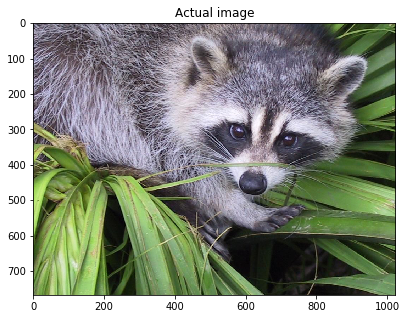

In [10]:
faceimg=misc.face()
plt.figure(figsize=(10,5))
plt.imshow(faceimg)
plt.title("Actual image")
plt.show()

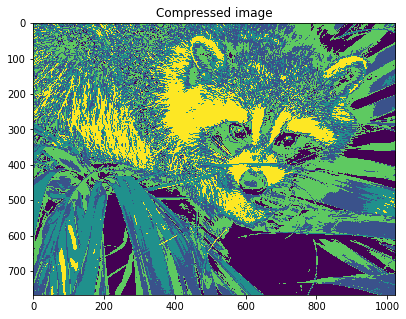

In [11]:
# displaying the compressed image
comp_image= plt.imread("Compressed_Image.png")
plt.figure(figsize=(10,5))
plt.imshow(comp_image)
plt.title("Compressed image")
plt.show()


## Decompression of image

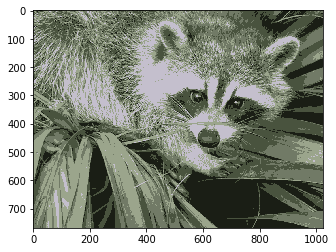

In [12]:
# Decompressing the image 
image = np.zeros((labels.shape[0],labels.shape[1],3),dtype=np.uint8 )
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        image[i,j,:] = clusters[labels[i,j],:]
plt.imsave('reconstructed_image.png',image);
plt.imshow(image)
plt.show()